In [1]:
# I should be able to co-register these images now
from arosics import COREG, DESHIFTER
import glob
import os
import sys

REFERENCE= r"C:\development\co-reg-script\AROSICS_coregistration\ID_mqq51_sample_int3.tif"
INFILE = r"C:\development\doodleverse\geowombat\floris_4-band_multispectral_Analytic_Ortho_Scene_QGIS\files\20240407_095805_57_24af_3B_AnalyticMS_clip.tif"


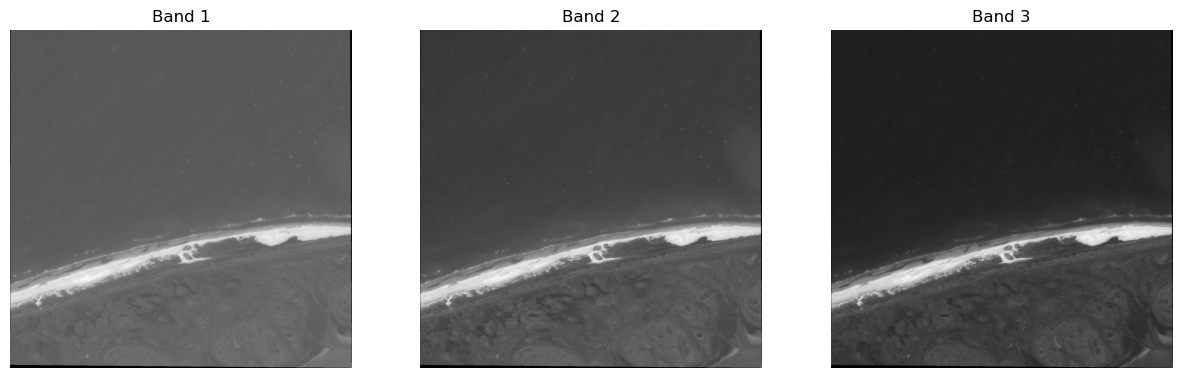

In [2]:
import rasterio
import matplotlib.pyplot as plt

# Open the TIFF file
with rasterio.open(INFILE) as src:
    # Read the raster data
    data = src.read()

    # Visualize the raster data
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for i, ax in enumerate(axes):
        ax.imshow(data[i], cmap='gray')
        ax.set_title(f'Band {i+1}')
        ax.axis('off')
    plt.show()

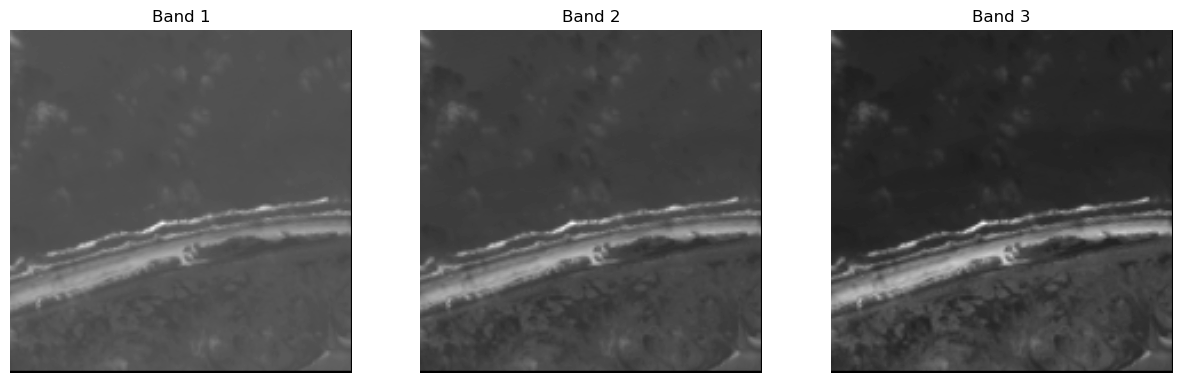

In [3]:
import rasterio
import matplotlib.pyplot as plt

# Open the TIFF file
with rasterio.open(REFERENCE) as src:
    # Read the raster data
    data = src.read()

    # Visualize the raster data
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for i, ax in enumerate(axes):
        ax.imshow(data[i], cmap='gray')
        ax.set_title(f'Band {i+1}')
        ax.axis('off')
    plt.show()


# CoRegister a Planet Image to a LandSat
- If the clouds in either image are present AND not masked out then the coregistration will fail


In [6]:
outfile=r"C:\development\coastseg-planet\coregistered_planet_by_landsat.tif"
# detect and correct global spatial shift 
CR = COREG(REFERENCE, INFILE,
           path_out=outfile,
           max_shift=500, 
           fmt_out='GTIFF',
           out_crea_options=['COMPRESS=DEFLATE'],
           max_iter = 10)
print(CR)
print(CR.correct_shifts())

Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00
Polygonize progress     |==========================------------------------| 52.0% Complete  => 0:00:00

Calculating footprint polygon and actual data corner coordinates for reference image...
Bounding box of calculated footprint for reference image:
	(662617.5, 5922562.5, 667087.5, 5927032.5)
Calculating footprint polygon and actual data corner coordinates for image to be shifted...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for image to be shifted:
	(662601.0, 5922564.0, 667119.0, 5927034.0)
Matching window position (X,Y): 664856.2255667822/5924807.507308026
Detected integer shifts (X/Y):                            0/0
Detected subpixel shifts (X/Y):                           0.23783894253818638/0.4510652833671041
Calculated total shifts in fft pixel units (X/Y):         0.23783894253818638/0.4510652833671041
Calculated total shifts in reference pixel units (X/Y):   0.23783894253818638/0.4510652833671041
Calculated total shifts in target pixel units (X/Y):      1.189194712690932/2.2553264168355205
Calculated map shifts (X,Y):				  3.567584138130769/-6.765979250892997
Calculated absolute shift vector length in map units:     7.648930108594065
Calculated angle of shift vector in degrees from North:   332.1980919352412
Original map info: ['UTM', 1.0, 1.0, 662601.0, 5927034.0, 3.0, 3.0, 31, 'North', 'WGS-84']
Updated map info:  ['UTM', 1.0, 1.0, '662604.5675841381', '59270

In [5]:
CR.ssim_improved

True